In [1]:
!pip install rakun2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 725.4/725.4 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 17.5 MB/s eta 0:00:00
  Created wheel for rakun2: filename=rakun2-0.25-py3-none-any.whl size=933179 sha256=2f9ee041db5a93576aed83468d71f53729a7e05f3d3dd1e1db191e619725783a
  Stored in directory: /root/.cache/pip/wheels/33/6e/94/01a2453fc88240862664d0b959e2e5c215797c606a7d4b610b
Successfully built rakun2
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.2 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23794 sha256=d75d28ddad0c098ddbf26248d4f6838cf6d86c35043c9fa4b32807ab37bbe83c
  Stored in directory: /root/.cache/pip/wheels/68/aa/41/82025d89b0eb97484c9ac7d527abf596765c41733af79f86b0
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125942 sha256=0a734c68c756ffe05d079e660bd9ce0642ae59dc39f97c

In [2]:
!pip install keyphrase_vectorizers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.4
    Uninstalling transformers-4.27.4:
      Successfully uninstalled transformers-4.27.4


In [3]:
!pip install yake


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.7 MB/s eta 0:00:00


In [4]:
import re
import os, os.path
import fnmatch
import json
import collections
import glob
import json

import matplotlib.pyplot as plt
import numpy as np
# import modules for web scrapping
import requests
from bs4 import BeautifulSoup


In [5]:
book = "Elon Musk_ Tesla, SpaceX, and the Quest for a Fantastic Future ( PDFDrive )"
startdate = 1600
enddate = 2023
wikilink = "https://en.wikipedia.org/wiki/Elon_Musk"
titlename = "Elon_Musk"

In [6]:
from google.colab import files
from zipfile import ZipFile

# with ZipFile(files.upload(), 'r') as zip:
#   zip.extractall()
#   print('Done')
file_name = rf"/content/{book}.zip"

with ZipFile(file_name, 'r') as zipf:
  zipf.extractall()
  print('Done')

Done


In [7]:
from keyphrase_vectorizers import KeyphraseCountVectorizer
from keybert import KeyBERT
import yake
from rakun2 import RakunKeyphraseDetector


def get_keyword_bert(docs):
    vectorizer = KeyphraseCountVectorizer(pos_pattern= '<N.*>+')
    kw_model = KeyBERT()
    onewords = kw_model.extract_keywords(docs=docs, vectorizer=vectorizer,top_n=5,stop_words='english')
    return onewords

def get_keyword_yake(docs):
    kw_extractor = yake.KeywordExtractor(lan="en", n=3, windowsSize=3,top = 5)
    keywords = kw_extractor.extract_keywords(docs)
    return keywords

def get_keyword_rakun(docs):
  hyperparameters = {"num_keywords": 5,
                   "merge_threshold": 1.1,
                   "alpha": 0.3,
                   "token_prune_len": 3}

  keyword_detector = RakunKeyphraseDetector(hyperparameters)
  out_keywords = keyword_detector.find_keywords(docs, input_type="string")
  return out_keywords



In [8]:
dir_path = rf"/content/{book}/part"
rootdir = rf"/content/{book}/"
part = 1
mp_bert, mp_yake, mp_rakun = {}, {}, {}
for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
    x = 1
    no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    print(no_of_chapters)
    while x <= no_of_chapters:
        target_x = no_of_chapters+1
        for i in range(x,target_x):
            with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                key = str(part) + '/chapter_'+ str(i)                
                content = content_file.read()
                print(key)
                mp_bert[key] = get_keyword_bert(content)
                mp_yake[key] = get_keyword_yake(content)
                mp_rakun[key] = get_keyword_rakun(content)
        x = target_x
        part += 1

9
1/chapter_1


2023-04-09 13:41:57,052 - KeyphraseVectorizer - INFO - It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
INFO:KeyphraseVectorizer:It looks like you do not have downloaded a list of stopwords yet. It is attempted to download the stopwords now.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


1/chapter_2
1/chapter_3
1/chapter_4
1/chapter_5
1/chapter_6
1/chapter_7
1/chapter_8
1/chapter_9


In [9]:
mp_bert

{'1/chapter_1': [('muskto', 0.4288),
  ('musk droveoff', 0.4088),
  ('musk', 0.4012),
  ('elon musk', 0.3936),
  ('muskhas', 0.3816)],
 '1/chapter_2': [('musk', 0.5469),
  ('source code toa video game musk', 0.54),
  ('elon musk', 0.5368),
  ('reeve musk', 0.5051),
  ('musk children', 0.4761)],
 '1/chapter_3': [('remind musk', 0.3979),
  ('muskfound', 0.3923),
  ('anotherof musk', 0.3775),
  ('musk', 0.3727),
  ('job musk', 0.3661)],
 '1/chapter_4': [('musk brothers', 0.4314),
  ('musk andkimbal', 0.3947),
  ('musknever', 0.3515),
  ('industrialist fantasies', 0.3474),
  ('musk letloose', 0.3446)],
 '1/chapter_5': [('world debtportfolio', 0.474),
  ('developedcountry debt', 0.4444),
  ('musk andmoritz', 0.4286),
  ('muskbegan', 0.4269),
  ('musk', 0.4118)],
 '1/chapter_6': [('spaceelon musk turned thirty', 0.6108),
  ('spacex executives musk', 0.5829),
  ('elon musk', 0.5346),
  ('musk', 0.5236),
  ('musk foundhimself', 0.512)],
 '1/chapter_7': [('straubelfamily', 0.5385),
  ('1890s st

In [10]:
with open(rf"mp_{book}_bert.json", "w") as outfile:
    json.dump(mp_bert, outfile)

with open(rf"mp_{book}_yake.json", "w") as outfile:
    json.dump(mp_yake, outfile)

with open(rf"mp_{book}_rakun.json", "w") as outfile:
    json.dump(mp_rakun, outfile)

In [11]:
mp_combined = {}
for k in mp_rakun.keys():
  k1 = set([v[0] for v in mp_bert[k]])
  k2 = set([v[0] for v in mp_yake[k]])
  k3 = set([v[0] for v in mp_rakun[k]])
  mp_combined[k] = k1.union(k2,k3)

# mp_combined
for k,v in mp_combined.items():
  print(len(v))

15
15
15
15
15
15
15
15
15


In [12]:
keyword_to_chap = collections.defaultdict(list)
for key,list_val in mp_combined.items():
    for val in list_val:
        keyword_to_chap[val].append(key)


final_keywords = set()
all_keywords = list(mp_combined.values())
for i in all_keywords:
    for val in i:
            final_keywords.add(val)
print(final_keywords)   
print(len(final_keywords))

{'musk brothers', 'talented engineers', 'ELON', 'venture capitalist', 'backof the gold', 'aerospace industry', 'battery pack', 'relate to thismode', 'thousands of workers', 'Tesla', 'MUSK', 'charging stations', 'source code toa video game musk', 'extinguishinghuman consciousness', 'leadership and governmentalissues.', 'varied as YouTube,Palantir', 'printers and folding', 'electric vehicles', 'deflect and destroydebris', 'renewable energy', 'financial situation', 'venture capital', 'design straubel', 'upholstery or rearview', '1890s straubel', 'production office', 'musk droveoff', 'industrialist fantasies', 'spaceelon musk turned thirty', 'islandsin the Bahamas', 'aerospace companies', 'electric vehicle', 'process theirinterrelationships', 'venture capitalists', 'INFUSED ELON MUSK', 'muskto', 'pursuing collectiveenlightenment', 'Ressi', 'muskbegan', 'developedcountry debt', 'elon musk', 'itswindshields or upholstery', 'England to gather', 'electric cars', 'tired and mad', 'true cofounde

In [13]:
def get_year_to_content():
    dir_path = rf"/content/{book}/part"
    rootdir =rf"/content/{book}/"
    date_dict = {}
    year_mode_dict = {}
    # for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        #print("part:" + str(part))
        date_dict[str(part)] = {}
        year_mode_dict[str(part)] = {}
        #print(dir_path + str(part) + '/')
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
    #     print('no.of_chapters:' + str(no_of_chapters))
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                with open(dir_path + str(part) + '/chapter_'+ str(i) + '.txt', 'r', encoding='utf-8') as content_file:
                    content = content_file.read()

                regex= "\d{4}"
                dates = re.findall(regex, content)
                mdates = []
                year_list = []
                try:
                    for date in dates:
                        if int(date) <= enddate and int(date) >= startdate:                    
                            #print date
                            year_list.append(date)
                            mdates.append(date)                       
                except:
                    pass
                date_dict[str(part)][str(i)] = mdates
                try:
                    year_mode_dict[str(part)][str(i)] = max(set(year_list), key=year_list.count)
                except:
                    year_mode_dict[str(part)][str(i)] = -1
            x = target_x
            part += 1

    # assigning chapter the date with closest chapter
    def closest(lst, K):
        if lst:
          return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]
        else:
          return -1


    #for part in range(1,Parts+1):
    part = 1
    for path in glob.glob(f'{rootdir}/*/**/', recursive=True):
        x = 1
        # checking which chapters has date assigned
        no_of_chapters = len(fnmatch.filter(os.listdir(dir_path + str(part) + '/'), '*.txt'))
        chapters_with_date = []
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                # print("chapter:" + str(i))
                if year_mode_dict[str(part)][str(i)] != -1:
                    chapters_with_date.append(i)
            x = target_x
        x = 1
        # assigning date to chapter which is closest to it
        while x <= no_of_chapters:
            target_x = no_of_chapters+1
            for i in range(x,target_x):
                #print("chapter:" + str(i))
                k = closest(chapters_with_date,i)
                #print("K:",k)
                year_mode_dict[str(part)][str(i)] = year_mode_dict[str(part)][str(k)]
            x = target_x
        part += 1

    year_to_chap = collections.defaultdict(list)  # year -> list of folder paths
    for key in year_mode_dict.keys():
        folder = f"{key}"
        for k2 in year_mode_dict[key].keys():
            file = folder
            file += f"/chapter_{k2}"
            val = year_mode_dict[key][k2]
            year_to_chap[val].append(file)

    return year_to_chap

year_to_chap = get_year_to_content()

keys = []
for k in list(keyword_to_chap.keys()):
    keys.append(k.title().replace(" ", "_"))
keyword_to_chap2 = dict(zip(keys, list(keyword_to_chap.values())))

# year_to_chap
chap_to_year = {}
for k,v in year_to_chap.items():
    for l in v:
        chap_to_year[l]= int(k)
# chap_to_year
keyword_to_year = collections.defaultdict(set)
for k,v in keyword_to_chap.items():
    for l in v:
        keyword_to_year[k.title().replace(" ", "_")].add(chap_to_year[l])
# print(keyword_to_year)

key_yr_chap_mp = collections.defaultdict(list)
for k,v in keyword_to_chap2.items():
    for chap in v:
        key_yr_chap_mp[k+'_'+str(chap_to_year[chap])].append(chap)
print(key_yr_chap_mp)

defaultdict(<class 'list'>, {'Muskhas_2002': ['1/chapter_1'], 'Backof_The_Gold_2002': ['1/chapter_1'], 'Silicon_Valley_2002': ['1/chapter_1'], 'Musk_1999': ['1/chapter_5'], 'Muskto_2002': ['1/chapter_1'], 'Thousands_Of_Workers_2002': ['1/chapter_1'], 'Largest_Shareholder_2002': ['1/chapter_1'], 'Largest_Shareholder_1999': ['1/chapter_5'], 'Venture_Capital_2002': ['1/chapter_1'], 'Musk_Droveoff_2002': ['1/chapter_1'], 'Elon_Musk_2002': ['1/chapter_1', '1/chapter_6'], 'Elon_Musk_1948': ['1/chapter_2'], 'Extinguishinghuman_Consciousness_2002': ['1/chapter_1'], 'Arejust_As_Dramatic_2002': ['1/chapter_1'], 'Designer_Jeans_2002': ['1/chapter_1'], 'Artificial_Intelligence_2002': ['1/chapter_1'], 'Clothing_And_Goggles_1948': ['1/chapter_2'], 'Process_Theirinterrelationships_1948': ['1/chapter_2'], 'Boy_1948': ['1/chapter_2'], 'Met_Elon_Reeve_1948': ['1/chapter_2'], 'Goggles_And_Shoteach_1948': ['1/chapter_2'], 'Pursuing_Collectiveenlightenment_1948': ['1/chapter_2'], 'Required_Military_1948': 

In [14]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('all-MiniLM-L6-v2')

def create_representative_doc(corpus,query):
    corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    
    cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0]
    paragraph = ""
    for i,score in enumerate(cos_scores):
        if score >0.40:
            paragraph += (corpus[i]+'.')

    return paragraph

In [15]:
key_yr_chap_mp

defaultdict(list,
            {'Muskhas_2002': ['1/chapter_1'],
             'Backof_The_Gold_2002': ['1/chapter_1'],
             'Silicon_Valley_2002': ['1/chapter_1'],
             'Musk_1999': ['1/chapter_5'],
             'Muskto_2002': ['1/chapter_1'],
             'Thousands_Of_Workers_2002': ['1/chapter_1'],
             'Largest_Shareholder_2002': ['1/chapter_1'],
             'Largest_Shareholder_1999': ['1/chapter_5'],
             'Venture_Capital_2002': ['1/chapter_1'],
             'Musk_Droveoff_2002': ['1/chapter_1'],
             'Elon_Musk_2002': ['1/chapter_1', '1/chapter_6'],
             'Elon_Musk_1948': ['1/chapter_2'],
             'Extinguishinghuman_Consciousness_2002': ['1/chapter_1'],
             'Arejust_As_Dramatic_2002': ['1/chapter_1'],
             'Designer_Jeans_2002': ['1/chapter_1'],
             'Artificial_Intelligence_2002': ['1/chapter_1'],
             'Clothing_And_Goggles_1948': ['1/chapter_2'],
             'Process_Theirinterrelationships_

In [16]:
def split_sentence_from_text(key):
    file_loc = rf"/content/{book}/part%s.txt"%key
    text = ""
    with open(file_loc,encoding="utf8") as f:
        text = f.read()

    res = re.findall(r"[^.!?]+", text)
    return res

mp_key_doc = {}
for key,val in key_yr_chap_mp.items():
    mp_key_doc[key] = ""
    print(f"{key}")
    for k in val:
        corpus = split_sentence_from_text(k)
#         doc = create_representative_doc(corpus,key)
        mp_key_doc[key] += create_representative_doc(corpus,key)

# print(mp_key_doc)

Muskhas_2002
Backof_The_Gold_2002
Silicon_Valley_2002
Musk_1999
Muskto_2002
Thousands_Of_Workers_2002
Largest_Shareholder_2002
Largest_Shareholder_1999
Venture_Capital_2002
Musk_Droveoff_2002
Elon_Musk_2002
Elon_Musk_1948
Extinguishinghuman_Consciousness_2002
Arejust_As_Dramatic_2002
Designer_Jeans_2002
Artificial_Intelligence_2002
Clothing_And_Goggles_1948
Process_Theirinterrelationships_1948
Boy_1948
Met_Elon_Reeve_1948
Goggles_And_Shoteach_1948
Pursuing_Collectiveenlightenment_1948
Required_Military_1948
Reeve_Musk_1948
Source_Code_Toa_Video_Game_Musk_1948
Elon_1989
Elon_1995
Elon_Reeve_Musk_1948
Military_Service_1948
Musk_Children_1948
Electric_Cars_1989
Electric_Cars_2007
Electric_Cars_2014
Job_Musk_1989
Renewable_Energy_1989
Anotherof_Musk_1989
Ressi_1989
Handwritten_Romanticmusings_1989
Distinctionbetween_Stumbling_1989
Remind_Musk_1989
Justine_1989
Justine_2008
Canada_1989
Muskfound_1989
Identify_Interestingpeople_1989
Musk_Brothers_1995
Talented_Engineers_1995
Musknever_1995
A

In [17]:
with open(rf"mp_key_doc_{book}.json", "w") as outfile:
    json.dump(mp_key_doc, outfile)

In [18]:
url = wikilink
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
response = requests.get(url, headers=headers)
#print(response.status_code)
soup = BeautifulSoup(response.content, 'html.parser')

desired_ids = []
for link in soup.find_all('span', attrs={'class':'mw-headline'}):
    if link.get('id') is not None: 
        desired_ids.append(link.get('id'))
print(desired_ids)

def FetchParagraphBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())

    my_lst = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
            my_lst.append(tag.get_text())
        if tag == endElem:
            inBetween = False
            break
    return "".join(my_lst)

id_to_paragraph = {}
for i in range(len(desired_ids)-1):
    id_to_paragraph[desired_ids[i]] = FetchParagraphBetweenIds(desired_ids[i],desired_ids[i+1])

['Early_life', 'Childhood_and_family', 'Education', 'Business_career', 'Zip2', 'X.com_and_PayPal', 'SpaceX', 'Starlink', 'Tesla', 'SEC_and_shareholder_lawsuits_regarding_tweets', 'SolarCity_and_Tesla_Energy', 'Neuralink', 'The_Boring_Company', 'Twitter', 'Leadership_style', 'Other_activities', 'Musk_Foundation', 'Hyperloop', 'OpenAI', 'Tham_Luang_cave_rescue_and_defamation_case', '2018_Joe_Rogan_podcast_appearance', 'Music', 'Private_jet', 'ElonJet_account', 'Wealth', 'Sources_of_wealth', 'Personal_views_and_Twitter_usage', 'Existential_threats', 'Politics', 'COVID-19', 'Finance', 'Technology', 'Personal_life', 'Sexual_misconduct_allegations', 'Public_perception', 'Media_appearances', 'Recognition', 'See_also', 'Notes', 'References', 'Bibliography', 'External_links']


In [19]:
from sentence_transformers import SentenceTransformer, util
import torch

mp_sim_score = {}
embedder = SentenceTransformer('all-MiniLM-L6-v2')

for key1, val1 in id_to_paragraph.items():
    for key2,val2 in mp_key_doc.items():
        if val1 != '' and val2 != '':
            corpus_embeddings = embedder.encode(val1, convert_to_tensor=True)
            query_embedding = embedder.encode(val2, convert_to_tensor=True)
            cos_scores = util.cos_sim(query_embedding, corpus_embeddings)[0][0]
            mp_sim_score[str(key1)+'->'+str(key2)] = cos_scores
            # print(f"{key1} {key2} {cos_scores}")

In [20]:
mp_sim_score

{'Childhood_and_family->Muskhas_2002': tensor(0.2444, device='cuda:0'),
 'Childhood_and_family->Silicon_Valley_2002': tensor(0.1946, device='cuda:0'),
 'Childhood_and_family->Musk_1999': tensor(0.2908, device='cuda:0'),
 'Childhood_and_family->Muskto_2002': tensor(0.2324, device='cuda:0'),
 'Childhood_and_family->Thousands_Of_Workers_2002': tensor(0.0631, device='cuda:0'),
 'Childhood_and_family->Largest_Shareholder_2002': tensor(0.1288, device='cuda:0'),
 'Childhood_and_family->Largest_Shareholder_1999': tensor(0.1769, device='cuda:0'),
 'Childhood_and_family->Venture_Capital_2002': tensor(0.1983, device='cuda:0'),
 'Childhood_and_family->Musk_Droveoff_2002': tensor(0.3011, device='cuda:0'),
 'Childhood_and_family->Elon_Musk_2002': tensor(0.3528, device='cuda:0'),
 'Childhood_and_family->Elon_Musk_1948': tensor(0.5553, device='cuda:0'),
 'Childhood_and_family->Clothing_And_Goggles_1948': tensor(0.0488, device='cuda:0'),
 'Childhood_and_family->Boy_1948': tensor(0.3453, device='cuda:0'

In [21]:
mp_sim_score = {k: v.item() for k, v in mp_sim_score.items()}

with open(rf"mp_sim_score_{book}.json", "w") as outfile:
    json.dump(mp_sim_score, outfile)

In [22]:
import json
with open(f"mp_sim_score_{book}.json") as outfile:
    mp_sim_score = json.load(outfile)

In [23]:
def display_bar_plot(dict_t,title,xlab,ylab):
    plt.figure(figsize=(10,7))
    plt.bar(*zip(*dict_t.items()))
    plt.title(title)
    # plt.grid()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [24]:
mp_sim_score_bar_range = {}
a,b,c,d,e = 0,0,0,0,0
for k,v in mp_sim_score.items():
    if v<0:
        a += 1
    elif v>=0 and v<0.25:
        b+= 1
    elif v>=0.25 and v<0.5:
        c += 1
    elif v>=0.5 and v<0.75:
        d += 1
    elif v>= 0.75:
        e += 1
mp_sim_score_bar_range["<0"] = a
mp_sim_score_bar_range["0-0.25"] = b
mp_sim_score_bar_range["0.25-0.5"] = c
mp_sim_score_bar_range["0.5-0.75"] = d
mp_sim_score_bar_range["0.75-1"] = e


# display_bar_plot(mp_sim_score_bar_range,rf"similarity distribution for {book}","similarity","count")

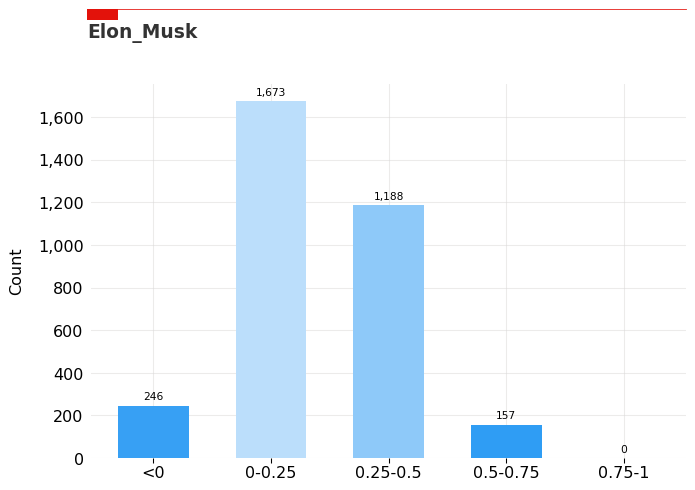

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator

# Create the figure and axes objects, specify the size and the dots per inches
# delay_by_month['Month'], delay_by_month['ArrDelay'] ->  
# list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values())

fig, ax = plt.subplots(figsize=(8,6), dpi = 96)

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()),width=0.6)
# Create the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# Reformat x-axis label and tick labels
ax.set_xlabel('', fontsize=12, labelpad=10) # No need for an axis label
ax.xaxis.set_label_position("bottom")
ax.xaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_tick_params(pad=2, labelbottom=True, bottom=True, labelsize=12, labelrotation=0)
labels = list(mp_sim_score_bar_range.keys())
ax.set_xticks(list(mp_sim_score_bar_range.keys()), labels) # Map integers numbers from the series to labels list

# Reformat y-axis
ax.set_ylabel('Count', fontsize=12, labelpad=10)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_formatter(lambda s, i : f'{s:,.0f}')
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bar1, labels=[f'{e:,.0f}' for e in list(mp_sim_score_bar_range.values())], padding=3, color='black', fontsize=8) 

# Remove the spines
ax.spines[['top','left','right','bottom']].set_visible(False)

# Make the left spine thicker
ax.spines['right'].set_linewidth(1.1)

# Add in red line and rectangle on top
ax.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color='#E3120B', linewidth=.6)
ax.add_patch(plt.Rectangle((0.12,.98), 0.04, -0.02, facecolor='#E3120B', transform=fig.transFigure, clip_on=False, linewidth = 0))

# Add in title and subtitle
ax.text(x=0.12, y=.93, s=titlename, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
# ax.text(x=0.12, y=.90, s="between Wikipedia section content and Keyword focused paragraph", transform=fig.transFigure, ha='left', fontsize=12, alpha=.8)

# Set source text
# ax.text(x=0.1, y=0.12, s="Mahatma Gandhi", transform=fig.transFigure, ha='left', fontsize=10, alpha=.7)

# Adjust the margins around the plot area
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)

# Set a white background
fig.patch.set_facecolor('white')

# Colours - Choose the extreme colours of the colour map
colours = ["#2196f3", "#bbdefb"]

# Colormap - Build the colour maps
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(min(list(mp_sim_score_bar_range.values())), max(list(mp_sim_score_bar_range.values()))) # linearly normalizes data into the [0.0, 1.0] interval

# Plot bars
bar1 = ax.bar(list(mp_sim_score_bar_range.keys()), list(mp_sim_score_bar_range.values()), color=cmap(norm(list(mp_sim_score_bar_range.values()))), width=0.6, zorder=2)
fig.savefig(f"similarity_distribution_{book}.png")

In [26]:
from statistics import median
def fetch_single_date_from_content(content):
    regex= "\d{4}"
    dates = re.findall(regex, content)
    year_list = []
    res = -1
    try:
        for date in dates:
            if int(date) <= enddate and int(date) >= startdate:                    
                #print date
                year_list.append(int(date))
    except:
        pass
    if year_list:
        # res = max(set(year_list), key=year_list.count)
        res = median(year_list)
    return int(res)
    
wiki_section_date = {}
for k,v in id_to_paragraph.items():
#     print(fetch_dates_from_content(v))
    wiki_section_date[k] = fetch_single_date_from_content(v)
print(wiki_section_date)

{'Early_life': -1, 'Childhood_and_family': 1975, 'Education': 1994, 'Business_career': -1, 'Zip2': 1997, 'X.com_and_PayPal': 2001, 'SpaceX': 2011, 'Starlink': 2019, 'Tesla': 2016, 'SEC_and_shareholder_lawsuits_regarding_tweets': 2020, 'SolarCity_and_Tesla_Energy': 2015, 'Neuralink': 2020, 'The_Boring_Company': 2018, 'Twitter': 2022, 'Leadership_style': 2021, 'Other_activities': -1, 'Musk_Foundation': 2018, 'Hyperloop': 2017, 'OpenAI': 2016, 'Tham_Luang_cave_rescue_and_defamation_case': 2019, '2018_Joe_Rogan_podcast_appearance': 2020, 'Music': 2019, 'Private_jet': 2018, 'ElonJet_account': 2022, 'Wealth': 2021, 'Sources_of_wealth': 2020, 'Personal_views_and_Twitter_usage': 2015, 'Existential_threats': 2016, 'Politics': 2020, 'COVID-19': 2020, 'Finance': 2021, 'Technology': 2021, 'Personal_life': 2020, 'Sexual_misconduct_allegations': 2018, 'Public_perception': 2005, 'Media_appearances': 2016, 'Recognition': 2015, 'See_also': -1, 'Notes': -1, 'References': -1, 'Bibliography': -1}


In [27]:
# keeping a threshold
mp_sim_score_50 = {}
for key,val in mp_sim_score.items():
    if val >= 0.30:
        mp_sim_score_50[key] = val

        
# section wise hyperlink
section_wise_keyword = collections.defaultdict(set)
for k,v in mp_sim_score_50.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword[section_name].add(keyword.title().replace(" ", "_"))
    
# section_wise_keyword
mixed_sim_score = {}
date_diff = 0
for k,v in section_wise_keyword.items():
    for elem in v:
        key = k+'->'+elem
        d_k = int(elem[elem.rindex('_')+1:])
        d_w = wiki_section_date[k]
#         print(f"{d_k}    {d_w}")
        if d_w == -1: date_diff = enddate-startdate
        else: date_diff = abs(d_k-d_w)+1
        date_score = 1/date_diff
        sim_score = mp_sim_score_50[key]
        rank = 0.5*date_score + 0.5*sim_score
        mixed_sim_score[key] = rank

## Keyword Filteration 1

In [28]:
section_wise_keyword_filtered = collections.defaultdict(list)
for k,v in mixed_sim_score.items():
    section_name, keyword = k.split('->')[0],k.split('->')[1]
    section_wise_keyword_filtered[section_name].append((keyword.title().replace(" ", "_"),v))

final_kw = set()

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    final_kw.add(ele[0])
# print(final_kw)
print(len(final_kw))

# initialization
kw_max_score = {}
for k in final_kw:
  kw_max_score[k] = 0

for k,v in section_wise_keyword_filtered.items():
  for ele in v:
    kw_max_score[ele[0]] = max(kw_max_score[ele[0]], ele[1])
# print(kw_max_score)


77


In [29]:
for k,v in section_wise_keyword_filtered.items():
  print(f"{k}   ->  {len(v)}")

Childhood_and_family   ->  26
Education   ->  28
Zip2   ->  35
X.com_and_PayPal   ->  30
SpaceX   ->  42
Starlink   ->  19
Tesla   ->  49
SEC_and_shareholder_lawsuits_regarding_tweets   ->  44
SolarCity_and_Tesla_Energy   ->  33
Neuralink   ->  14
The_Boring_Company   ->  18
Twitter   ->  28
Leadership_style   ->  49
Musk_Foundation   ->  34
Hyperloop   ->  36
OpenAI   ->  20
Tham_Luang_cave_rescue_and_defamation_case   ->  20
2018_Joe_Rogan_podcast_appearance   ->  29
Private_jet   ->  34
ElonJet_account   ->  31
Wealth   ->  34
Sources_of_wealth   ->  36
Personal_views_and_Twitter_usage   ->  32
Existential_threats   ->  34
Politics   ->  24
COVID-19   ->  8
Finance   ->  30
Technology   ->  36
Personal_life   ->  36
Sexual_misconduct_allegations   ->  45
Public_perception   ->  38
Media_appearances   ->  34
Recognition   ->  28


In [30]:
mp_final_kw = collections.defaultdict(list)
for k,v in section_wise_keyword_filtered.items():
  mp = {}
  for ele in v:
    mp[ele[0]] = ele[1]
  for ele in v:
    if mp[ele[0]] == kw_max_score[ele[0]]:
      mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in mp_final_kw.items():
#   mp1[k] = len(v)
#   # print(f"{k}   ->  {len(v)}")

# print(mp1)

In [31]:
# section_wise_keyword_filtered
section_wise_keyword_sort =  collections.defaultdict(list)
for k ,v in mp_final_kw.items():
    if len(v)>=5:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)[:5]
    else:
        section_wise_keyword_sort[k] = sorted(v,key = lambda x:x[1],reverse = True)
        
section_wise_keyword_sort_only = collections.defaultdict(list)
for k,v in section_wise_keyword_sort.items():
    section_wise_keyword_sort_only[k] = [ele[0] for ele in v]
    
for k,v in section_wise_keyword_sort_only.items():
    print(f"{k}  ->   {v}")
mp1 = {}
for k,v in section_wise_keyword_sort_only.items():
  mp1[k] = len(v)
  # print(f"{k}   ->  {len(v)}")

print(mp1)

Childhood_and_family  ->   ['Reeve_Musk_1948', 'Elon_Musk_1948', 'Musk_Children_1948', 'Met_Elon_Reeve_1948', 'Pursuing_Collectiveenlightenment_1948']
Education  ->   ['Musk_Brothers_1995', 'Muskfound_1989', 'Job_Musk_1989', 'Anotherof_Musk_1989', 'Remind_Musk_1989']
Zip2  ->   ['Musk_Andkimbal_1995', 'Musk_Letloose_1995', 'Musknever_1995', 'Infused_Elon_Musk_1999', 'Musk_Andmoritz_1999']
X.com_and_PayPal  ->   ['Largest_Shareholder_2002', 'Largest_Shareholder_1999', 'Space_Industry_2002', 'Elon_Musk_2002', 'Spaceelon_Musk_Turned_Thirty_2002']
SpaceX  ->   ['Falcon_Rockets_2014', 'Rocket_Company_2002', 'Falcon_Rocketcome_2014', 'Fourth_Launch_2008']
Tesla  ->   ['Tesla_2008', 'Tesla_2007', 'Automotive_Industry_2014', 'Electric_Vehicles_2007', 'Hoodies_And_Hats_2014']
SEC_and_shareholder_lawsuits_regarding_tweets  ->   ['Elon_1995']
SolarCity_and_Tesla_Energy  ->   ['Solar_Panels_2014', 'Charging_Stations_2014', 'Electric_Cars_2014', 'Aerospace_Industry_2014', 'Battery_Technology_2007']

In [32]:
# top_mp_final_kw = collections.defaultdict(list)
# for k,v in mp_final_kw.items():
#   for ele in v:
#     if ele[1]>0.50:
#       print(ele)
#       top_mp_final_kw[k].append(ele)

# mp1 = {}
# for k,v in top_mp_final_kw.items():
#   mp1[k] = len(v)

# print(mp1)

In [33]:
# for k,v in section_wise_keyword_filtered.items():
#   mp = {}
#   for ele in v:
#     mp[ele[0]] = ele[1]

#   for ele in v:
#     if mp[ele[0]]  != kw_max_score[ele[0]]:
#       section_wise_keyword_filtered[k].remove(ele)

# for k,v in section_wise_keyword_filtered.items():
#   print(f"{k}   ->  {len(v)}")

In [34]:
with open(rf"filtered_kw_{book}.json", "w") as outfile:
    json.dump(mp_final_kw, outfile)

In [35]:
def kw_2_nrml(s1):
  temp = s1[:s1.rindex('_')]
  a = temp.split('_')
  # for i,v in enumerate(a):
  #     a[i] = v.lower()
      
  val = " ".join(a)
  return val
  
def find_freq(key,txt):
    reg = f"(?i){key}"
    return len(re.findall(rf"(?i){key}", txt))

temp = []
multitimekws = []
for k in final_kw:
  temp.append(kw_2_nrml(k))

mp = collections.Counter(temp)
for k,v in mp.items():
  if v>1:
    multitimekws.append(k)

print(multitimekws)
print(len(multitimekws))

section_to_num = {}  # this dict will store num of keywords which are present in keywords as a simple text
for k,v in section_wise_keyword_sort.items():
  cnt = set()
  for ele in v:
    temp = kw_2_nrml(ele[0])
    if find_freq(temp,id_to_paragraph[k])>0: #and temp not in multitimekws:
      cnt.add(temp)
  section_to_num[k] = cnt

mp2 = {}
for k,v in section_to_num.items():
  mp2[k] = len(v)

print(mp2)

['Electric Cars', 'Largest Shareholder', 'Elon Musk', 'Tesla', 'Justine']
5
{'Childhood_and_family': 1, 'Education': 0, 'Zip2': 0, 'X.com_and_PayPal': 1, 'SpaceX': 0, 'Tesla': 1, 'SEC_and_shareholder_lawsuits_regarding_tweets': 0, 'SolarCity_and_Tesla_Energy': 0, 'The_Boring_Company': 1, 'OpenAI': 0, 'Private_jet': 0, 'Finance': 0, 'Personal_life': 1, 'Sexual_misconduct_allegations': 0, 'Public_perception': 0, 'Media_appearances': 2, 'Recognition': 0}


In [36]:
print(sum(list(mp2.values())))

7


In [37]:
def FetchURLSBetweenIds(id1,id2):
    hElem = soup.find("span", {'id': id1})
    endElem = soup.find('span', {'id': id2})
    cntns = list(soup.find_all())
    linkToScrape = []
    inBetween = False
    for tag in cntns:
        if tag == hElem:
            inBetween = True
        if inBetween == True and tag.name == 'p':
#             my_lst.append(tag.get_text())
            allLinks = tag.find_all('a')
            
            for link in allLinks:
                if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
                    linkToScrape.append(link['href'].replace('/wiki/',""))
        if tag == endElem:
            inBetween = False
            break
    return set(linkToScrape)

mp_urls_section_mp  = {}
for i in range(len(desired_ids)-1):
    mp_urls_section_mp[desired_ids[i]] = FetchURLSBetweenIds(desired_ids[i],desired_ids[i+1])

# print(mp_urls_section_mp)

sec_2_common_link = {}
for k,v in section_wise_keyword_sort.items():
  couldbelinks = set()
  for ele in v:
    s1 = ele[0]
    couldbelinks.add(s1[:s1.rindex('_')])
  sec_2_common_link[k] = mp_urls_section_mp[k].intersection(couldbelinks)

print(sec_2_common_link)
# print(sum(list(sec_2_common_link.values())))
mp3 = {}
for k,v in sec_2_common_link.items():
  mp3[k] = len(v)

print(mp3)
print(sum(list(mp3.values())))

{'Childhood_and_family': set(), 'Education': set(), 'Zip2': set(), 'X.com_and_PayPal': set(), 'SpaceX': set(), 'Tesla': set(), 'SEC_and_shareholder_lawsuits_regarding_tweets': set(), 'SolarCity_and_Tesla_Energy': set(), 'The_Boring_Company': set(), 'OpenAI': set(), 'Private_jet': set(), 'Finance': set(), 'Personal_life': set(), 'Sexual_misconduct_allegations': set(), 'Public_perception': set(), 'Media_appearances': set(), 'Recognition': set()}
{'Childhood_and_family': 0, 'Education': 0, 'Zip2': 0, 'X.com_and_PayPal': 0, 'SpaceX': 0, 'Tesla': 0, 'SEC_and_shareholder_lawsuits_regarding_tweets': 0, 'SolarCity_and_Tesla_Energy': 0, 'The_Boring_Company': 0, 'OpenAI': 0, 'Private_jet': 0, 'Finance': 0, 'Personal_life': 0, 'Sexual_misconduct_allegations': 0, 'Public_perception': 0, 'Media_appearances': 0, 'Recognition': 0}
0


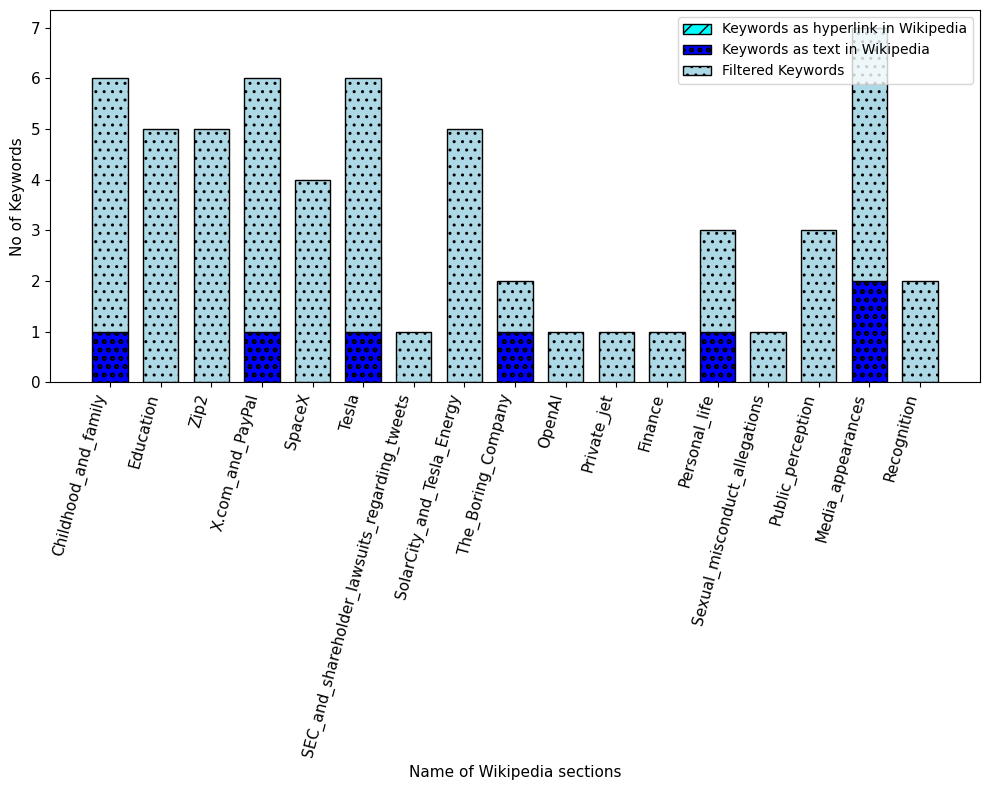

In [38]:
#Plot has been done for the tag has greater than 1 value
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (10, 8))

x = list(mp3.keys())
y1 = list(mp3.values())
y2 = list(mp2.values())
y3 = list(mp1.values())

plt.bar(x, y1, width=0.7, color ='#00FFFF', hatch= "//", edgecolor = "black")
plt.bar(x, y2, bottom=y1, width=0.7, color ='blue', hatch= "oo", edgecolor = "black")
plt.bar(x, y3, bottom=y2, width=0.7, color ='lightblue', hatch= "..", edgecolor = "black")

plt.xlabel("Name of Wikipedia sections", fontsize=11, y= -0.1)
#plt.ylabel("Ratio of the duplicate question\n to the all question associated\n with the particular tag", fontsize=14)
plt.ylabel("No of Keywords", fontsize=11)
#plt.title("Students enrolled in different courses")
plt.xticks(rotation=75, fontsize=11, ha="right")
plt.yticks(fontsize=11)
plt.legend(["Keywords as hyperlink in Wikipedia", "Keywords as text in Wikipedia", "Filtered Keywords"])

#plt.show()
plt.tight_layout()
plt.savefig(f"kw_dist_wiki_sec_{book}.png")

# Wikipedia Page Creation
I am targeting the keywords which are present in wikipedia as a text but no hyperlinks are present and timed keywords that are present in different wikipedia section but in different year

In [39]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Infused_Elon_Musk', 'Battery_Technology', 'Musk_Droveoff', 'Musk_Andmoritz', 'Aerospace_Industry', 'Engineer', 'Falcon_9S', 'Filming_Iron_Man', 'Muskhas', 'Iron_Man_Production_Office', 'Electric_Vehicles', 'Hoodies_And_Hats', 'Met_Elon_Reeve', 'Spaceelon_Musk_Turned_Thirty', 'Charging_Stations', 'Anotherof_Musk', 'Electric_Cars', 'Tesla', 'Automotive_Industry', 'Muskto', 'Musk_Letloose', 'Falcon_Rocketcome', 'Musk_Brothers', 'Elon_Musk', 'Industrialist_Fantasies', 'Elon_Reeve_Musk', 'Musk_Children', 'Musknever', 'Pursuing_Collectiveenlightenment', 'Iron_Man', 'Muskfound', 'Creator_Tony_Stark', 'Fourth_Launch', 'Remind_Musk', 'Big_Falcon_Rocketor_Big_Fucking_Rocket', 'Elon', 'Space_Industry', 'Solar_Panels', 'Job_Musk', 'Tony_Stark', 'Justine', 'Largest_Shareholder', 'Reeve_Musk', 'Construction', 'Musk_Andkimbal', 'Rocket_Company', 'Falcon_Heavy_Rocket', 'Falcon_Rockets'}


In [40]:
allLinks = soup.find(id="bodyContent").find_all("a")
linkToScrape = []
for link in allLinks:
    if link.get('href') is not None and link.get('href').find("/wiki/")== 0: 
        linkToScrape.append(link)

print(len(linkToScrape))
# print the urls of linkToScrape
# https://en.wikipedia.org/wiki/Nationalism#Anti-colonial_nationalism
# url = "https://en.wikipedia.org"
urls = set()
for link in linkToScrape:
    urls.add(link['href'].replace('/wiki/',""))
print(urls)
     

1553
{'Founders_Fund', 'SpaceX_launch_facilities#SpaceX_Rocket_Development_and_Test_Facility,_McGregor,_Texas', 'Robert_Hadfield', 'COVID-19_lockdowns', 'SpaceX_Dragon', 'Kennedy_Space_Center_Launch_Complex_39A', 'Stuart_J._Russell', 'Premal_Shah', 'Template:Tesla,_Inc.', 'Tesla_Model_X', 'Royal_Society', 'Category:Articles_with_CINII_identifiers', 'Template:SpaceX', 'Angel_investor', 'Portal:Internet', 'Falcon_9_Block_5', 'Animal_Welfare_Act_of_1966', 'Template_talk:Tesla,_Inc.', 'Palo_Alto', 'Butler_Lampson', 'Robert_Woolston_Hunt', 'Portal:South_Africa', 'Demis_Hassabis', 'Edward_Teller', 'File:Elon_Musk,_Tesla_Factory,_Fremont_(CA,_USA)_(8765031426).jpg', 'Category:People_from_Pretoria', 'Doxing', 'Twitter', 'SpaceX_Dragon_2', 'One_Crew_over_the_Crewcoo%27s_Morty', 'Federal_Deposit_Insurance_Corporation', 'In_vitro_fertilisation', 'Elihu_Thomson', 'Category:Canadian_chairpersons_of_corporations', 'ISBN_(identifier)', 'Category:21st-century_American_businesspeople', 'BloodPop', 'Aze

In [41]:
hyperlinks_present = final_keywords & set(urls)
print(hyperlinks_present)
len(hyperlinks_present)

set()


0

In [42]:
final_keywords = set()
for k,v in section_wise_keyword_sort_only.items():
    for s1 in v:
        final_keywords.add(s1)
#         final_keywords.add(s1[:s1.rindex('_')])
# key_yr_chap_mp
print(final_keywords)

{'Musk_Andkimbal_1995', 'Musknever_1995', 'Rocket_Company_2002', 'Falcon_9S_2014', 'Largest_Shareholder_1999', 'Largest_Shareholder_2002', 'Falcon_Rocketcome_2014', 'Elon_1995', 'Musk_Brothers_1995', 'Elon_Musk_2002', 'Justine_2008', 'Anotherof_Musk_1989', 'Falcon_Rockets_2014', 'Electric_Cars_2014', 'Reeve_Musk_1948', 'Solar_Panels_2014', 'Battery_Technology_2007', 'Musk_Andmoritz_1999', 'Musk_Droveoff_2002', 'Falcon_Heavy_Rocket_2014', 'Aerospace_Industry_2014', 'Iron_Man_Production_Office_2008', 'Construction_2002', 'Engineer_1999', 'Hoodies_And_Hats_2014', 'Remind_Musk_1989', 'Creator_Tony_Stark_2008', 'Pursuing_Collectiveenlightenment_1948', 'Tesla_2008', 'Fourth_Launch_2008', 'Elon_Reeve_Musk_1948', 'Musk_Letloose_1995', 'Musk_Children_1948', 'Electric_Cars_1989', 'Elon_Musk_1948', 'Job_Musk_1989', 'Tesla_2007', 'Charging_Stations_2014', 'Muskhas_2002', 'Muskto_2002', 'Electric_Vehicles_2007', 'Space_Industry_2002', 'Spaceelon_Musk_Turned_Thirty_2002', 'Filming_Iron_Man_2008', 'B

In [43]:
keyword_to_chap_final = {}
for k,v in key_yr_chap_mp.items():
    if k in final_keywords:
        keyword_to_chap_final[k] = v
print(keyword_to_chap_final)

{'Muskhas_2002': ['1/chapter_1'], 'Muskto_2002': ['1/chapter_1'], 'Largest_Shareholder_2002': ['1/chapter_1'], 'Largest_Shareholder_1999': ['1/chapter_5'], 'Musk_Droveoff_2002': ['1/chapter_1'], 'Elon_Musk_2002': ['1/chapter_1', '1/chapter_6'], 'Elon_Musk_1948': ['1/chapter_2'], 'Met_Elon_Reeve_1948': ['1/chapter_2'], 'Pursuing_Collectiveenlightenment_1948': ['1/chapter_2'], 'Reeve_Musk_1948': ['1/chapter_2'], 'Elon_1995': ['1/chapter_4'], 'Elon_Reeve_Musk_1948': ['1/chapter_2'], 'Musk_Children_1948': ['1/chapter_2'], 'Electric_Cars_1989': ['1/chapter_3'], 'Electric_Cars_2014': ['1/chapter_9'], 'Job_Musk_1989': ['1/chapter_3'], 'Anotherof_Musk_1989': ['1/chapter_3'], 'Remind_Musk_1989': ['1/chapter_3'], 'Justine_2008': ['1/chapter_8'], 'Muskfound_1989': ['1/chapter_3'], 'Musk_Brothers_1995': ['1/chapter_4'], 'Musknever_1995': ['1/chapter_4'], 'Musk_Andkimbal_1995': ['1/chapter_4'], 'Musk_Letloose_1995': ['1/chapter_4'], 'Industrialist_Fantasies_1995': ['1/chapter_4'], 'Infused_Elon_Mus

In [44]:
final_keyword_freq = list()
for s1 in final_keywords:
    temp = s1[:s1.rindex('_')]
    a = temp.split('_')
    for i,v in enumerate(a):
        a[i] = v.lower()
        
    final_keyword_freq.append(" ".join(a))
print(final_keyword_freq)

['musk andkimbal', 'musknever', 'rocket company', 'falcon 9s', 'largest shareholder', 'largest shareholder', 'falcon rocketcome', 'elon', 'musk brothers', 'elon musk', 'justine', 'anotherof musk', 'falcon rockets', 'electric cars', 'reeve musk', 'solar panels', 'battery technology', 'musk andmoritz', 'musk droveoff', 'falcon heavy rocket', 'aerospace industry', 'iron man production office', 'construction', 'engineer', 'hoodies and hats', 'remind musk', 'creator tony stark', 'pursuing collectiveenlightenment', 'tesla', 'fourth launch', 'elon reeve musk', 'musk letloose', 'musk children', 'electric cars', 'elon musk', 'job musk', 'tesla', 'charging stations', 'muskhas', 'muskto', 'electric vehicles', 'space industry', 'spaceelon musk turned thirty', 'filming iron man', 'big falcon rocketor big fucking rocket', 'met elon reeve', 'industrialist fantasies', 'muskfound', 'infused elon musk', 'iron man', 'automotive industry', 'tony stark']


In [45]:
import re
para = ""
for k,v in id_to_paragraph.items():
    para += v


final_keyword_freq_mp = {}
for k in final_keyword_freq:
    final_keyword_freq_mp[k] = find_freq(k,para)

total = len(final_keyword_freq)
cnt = 0
for k,v in final_keyword_freq_mp.items():
    if v>0:
        cnt += 1
        
print(cnt)
print(total)
print(cnt/total)

12
52
0.23076923076923078
